### IMPORTS

In [1]:
from Inference import BBVI 

In [2]:
import torch
import matplotlib.pyplot as plt

### EXAMPLE

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [6]:
# load data
data = torch.load('data/foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

In [89]:
Net = BBVI.VariationalNetwork(input_size=1, output_size=1, layer_width=5, nb_layers=3, device=device)

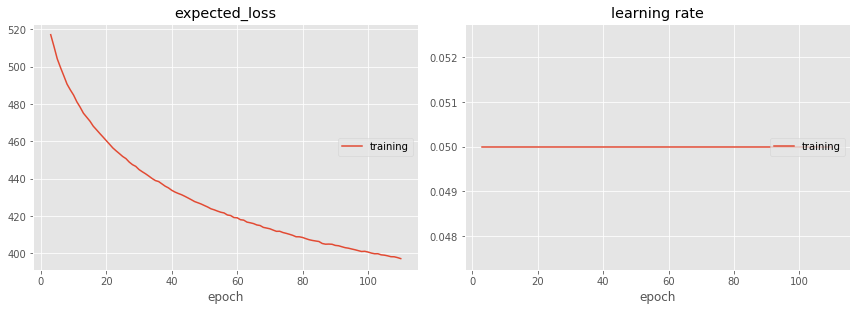

expected_loss:
training   (min:  397.116, max:  729.309, cur:  397.116)

learning rate:
training   (min:    0.050, max:    0.050, cur:    0.050)


KeyboardInterrupt: 

In [99]:
optimizer = torch.optim.Adagrad
optimizer_params = {'lr': 0.5}
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 2, 'factor': 0.5}

voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params, min_lr=0.00001)
Net = voptimizer.run((x_data,y_data), n_epoch=10000, n_iter=50, n_ELBO_samples=20, plot=True)

In [90]:
Net.make_deterministic_rhos()

In [91]:
Net.requires_grad_rhos(False)

In [95]:
Net.linear1.requires_grad_rhos(True)

In [93]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)

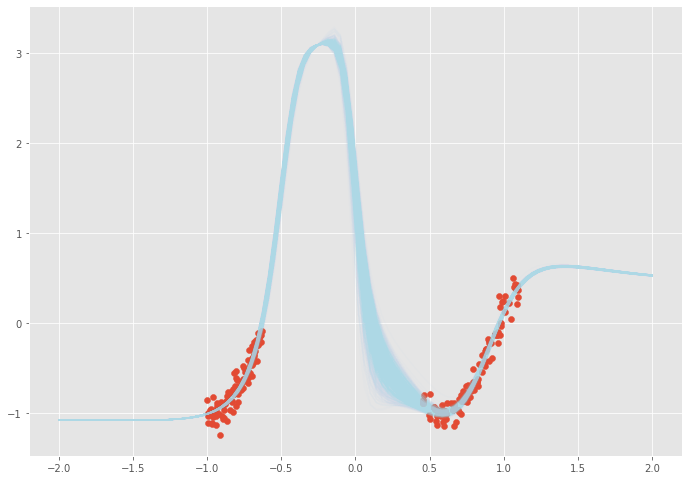

In [100]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    Net.sample_parameters()

    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue')

In [ ]:
data_validation = torch.load('Data/foong_data_validation.pt')
x_data_validation = data_validation[0].to(device)
y_data_validation = data_validation[1].to(device)
y_data_validation = y_data_validation.unsqueeze(-1)

In [ ]:
Net.sample_parameters(M=997)

In [ ]:
y_pred_validation = Net.forward(x_data_validation)

In [ ]:
y_pred_validation.shape

In [ ]:
scheduler

In [ ]:
LL = Net._log_norm(y_pred_validation, y_data_validation, torch.tensor(0.1).to(device))

In [ ]:
LL.sum(dim=[1,2]).shape

In [ ]:
LL.sum(dim=[1,2]).mean()

In [ ]:
Net.compute_elbo(x_data, y_data, n_samples_ELBO=100000, sigma_noise=0.1, device=device)